# <center> <font size="20"> -- Course Project Part 3 -- </font> </center>



<br/>

## <font size="20"> &#8681; </font> Import

- Import all packages required for Part 3

In [25]:
# import
#--------------------------------------------------#
import os 
import sys
import os.path
from sys import platform
from pathlib import Path
#--------------------------------------------------#
import re
import sys
import time
import copy
import math
import html
import scipy
import pickle
import random
import argparse
import subprocess
import numpy as np
import pandas as pd

#--------------------------------------------------#
from xgboost import XGBClassifier
#--------------------------------------------------#
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#--------------------------------------------------#
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
#--------------------------------------------------#
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#--------------------------------------------------#
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
#--------------------------------------------------#
from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
#--------------------------------------------------#
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
#--------------------------------------------------#

# Vader
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#--------------------------------------------------#
import warnings
warnings.filterwarnings("ignore")
#--------------------------------------------------#
from typing import Optional, Union, Tuple, Type, Sequence, List, Set, Dict, Any, TextIO, IO

from Part_3_utils import *


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\cesiu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!




<br/>

## <font size="20"> &#8681; </font> Deal with different environments. 
- Make sure the notebook runs properly in different environments.

In [2]:
#====================================================================================================#
# Install google-related packages. 

# !pip install google-colab
# !pip install --upgrade google-cloud
# !pip install --upgrade google-cloud-vision
# !pip install --upgrade google-api-python-client

#====================================================================================================#
# Identify if the env is google colab.
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB == True:
    from google.colab import drive
    drive.mount('/content/gdrive')
    file_1      = '/content/gdrive/MyDrive/sentiment_analysis.csv' 
    data_file   = '/content/gdrive/MyDrive/sentiment_analysis.csv' 
    data_folder = Path("./")
    # Will need to change all the file address in this notebook in order to .





<br/>

## <font size="20"> &#11088; </font>  <font size="20">**Part 3 Main**</font>



<br/>

## <font size="20"> &#8681; </font> Clean Data.
- Load the two raw dataset, and perform data preprocessing.
    - Part_2_Dataset_1_reddit_raw_ukraine_russia.csv
    - Part_2_Dataset_2_russian_invasion_of_ukraine.csv
- If saved files are found, load those preprocessed dataset directly.

In [3]:
from Part_3_Data_Process import *

#====================================================================================================#
# Args
Step_code               = "P03A_"
saved_preproc_dataset_1 = "Saving_preproc_dataset_1.p"
saved_preproc_dataset_2 = "Saving_preproc_dataset_2.p"
reprocess_dataset       = False

#====================================================================================================#
# Process Data 
if os.path.exists(saved_preproc_dataset_1) and not reprocess_dataset: 
    df_cleaned_1_all = pd.read_pickle(saved_preproc_dataset_1)
    print("\n\n" + "=" * 80 + "\nCleaned Part 2 Dataset #1 : ")
    beautiful_print(df_cleaned_1_all)
else:
    df_raw_1 = Load_dataset_1()
    df_cleaned_1_all = Clean_data(df_raw_1, num_words_lb = 2)
    df_cleaned_1_all.to_pickle(saved_preproc_dataset_1)

if os.path.exists(saved_preproc_dataset_2) and not reprocess_dataset: 
    df_cleaned_2_all = pd.read_pickle(saved_preproc_dataset_2)
    print("\n\n" + "=" * 80 + "\nCleaned Part 2 Dataset #2 : ")
    beautiful_print(df_cleaned_2_all)
else:
    df_raw_2 = Load_dataset_2()
    df_cleaned_2_all = Clean_data(df_raw_2, num_words_lb = 2)
    df_cleaned_2_all.to_pickle(saved_preproc_dataset_2)

# df_cleaned_1_all.to_csv(path_or_buf = "Saving_preproc_dataset_1.csv")
# df_cleaned_2_all.to_csv(path_or_buf = "Saving_preproc_dataset_2.csv")



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\cesiu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!




Cleaned Part 2 Dataset #1 : 
                                            cleaned_text
0      uhm thats quite the increase . i also heared t...
1      poland also announced that they plan to double...
2      remember , nato knows more than were being tol...
3      well done , putin . top 2022 salesman of nato ...
4      very good decision - russians are incapable of...
...                                                  ...
15780  not the region where you wanna practice russia...
15781  only estonia is far from the usa . if in the u...
15782  the russians can jump through the hoops to acq...
15783  at this point russia will invade anyone it wan...
15784  *" estonian and ukrainian languages are bold a...

[15785 rows x 1 columns]


Cleaned Part 2 Dataset #2 : 
                                             cleaned_text
0       what if i told you , barbarians already , this...
1       oh no . decathlon is bad ? i just ordered from...
2       last i read they have commited almost all thei



<br/>

## <font size="20"> &#8681; </font> Perform Topic Analysis using BERTopic.
- Use the BERTopic to get the topics of the entire dataset and identify topics in each comment.
- Save the analyzed results for future use. 
- If saved files are found, load the fitted model directly.

In [4]:

#====================================================================================================#
# Topic Analysis.

# Dataset #1
BERTopic_mpnet_base_1 = \
    Get_BERTopic_mpnet_base(df_cleaned_n_all   = df_cleaned_1_all                  ,
                            saved_fitted_model = "Saving_BERTopic_mpnet_base_1.p"  ,
                            )

BERTopic_original_1 = \
    Get_BERTopic_original(df_cleaned_n_all   = df_cleaned_1_all                    ,
                          saved_fitted_model = "Saving_BERTopic_original_1.p"      ,
                          )

# Dataset #2
BERTopic_mpnet_base_2 = \
    Get_BERTopic_mpnet_base(df_cleaned_n_all   = df_cleaned_2_all                  ,
                            saved_fitted_model = "Saving_BERTopic_mpnet_base_2.p"  ,
                            )







<br/>

## <font size="20"> &#8681; </font> Print Out the Top 20 Topics in dataset #1.
- Those in `topic #-1` are topicless comments. 

In [5]:
BERTopic_original_1.get_topic_info().head(20)

,Topic,Count,Name
0,-1,7381,-1_the_and_to_of
1,0,660,0_nato_russia_would_to
2,1,485,1_thanks_comment_yes_you
3,2,386,2_putin_he_his_putins
4,3,211,3_uk_france_europe_eu
5,4,204,4_finland_sweden_nato_finnish
6,5,184,5_gas_oil_sanctions_energy
7,6,168,6_phosphorus_smoke_incendiary_thermite
8,7,163,7_orban_hungary_hungarian_hungarians
9,8,152,8_ukraine_will_russia_and




<br/>

## <font size="20"> &#8681; </font> Print Out Certain Rows in the Dataframe.

In [6]:
print(BERTopic_original_1.get_topic_info().iloc[49:100, : ]) 

    Topic  Count                                      Name
49     48     42                   48_russia_ussr_sucks_su
50     49     42              49_strike_icbms_icbm_nuclear
51     50     42        50_ruzzia_ruzzian_ruzzians_ruzzias
52     51     41       51_airspace_flights_aviation_closed
53     52     40    52_estonia_estonian_language_estonians
54     53     39               53_nazi_nazis_jewish_racist
55     54     38           54_threats_threat_doomsday_fear
56     55     37                       55_tank_crew_m4_t34
57     56     37             56_crimes_crime_war_hiroshima
58     57     37          57_euc_offroad_onewheel_electric
59     58     36             58_toilets_toilet_steal_flush
60     59     36      59_relevant_meme_google_buhbuhbuhbut
61     60     36   60_kaliningrad_lithuania_nuclear_baltic
62     61     36       61_russian_idiotic_russians_fucking
63     62     35        62_missiles_missile_cruise_systems
64     63     35            63_british_accent_briish_ang



<br/>

## <font size="20"> &#8681; </font> Print Out Some Information of BERTopic Model.

In [7]:
# Get a list of keywords in Topic #0
print("Get a list of keywords in Topic #0: ")
print(BERTopic_original_1.get_topic(0))

# Topic ID for the first 20 sentences in the document.
print("\n")
print("Topic ID for the first 20 sentences in the document: ") 
print(BERTopic_original_1.topics_[:20]) 
print()

# Topic ID for the first 20 sentences in the document.
print("Identify topics for any new text inputs: ")
print(BERTopic_original_1.transform(["remember , nato knows more than were being told . thats an alarming amount of troops at the ready ."])[0][0])

# Print more details of the model.
print("")
BERTopic_original_1.get_document_info(BERTopic_original_1)

Get a list of keywords in Topic #0: 
[('nato', 0.030209624869508313), ('russia', 0.007526226894840088), ('would', 0.007092066713512764), ('to', 0.005915429442928039), ('war', 0.005734009564697304), ('if', 0.0053568512968442126), ('that', 0.005330678483078835), ('countries', 0.005233149395910426), ('and', 0.005037897001915042), ('be', 0.005037522530409137)]


Topic ID for the first 20 sentences in the document: 
[-1, 81, 0, 0, 0, 1, -1, -1, 16, -1, 0, 33, -1, 2, -1, -1, 0, 101, -1, 33]

Identify topics for any new text inputs: 


Batches: 100%|██████████| 1/1 [00:02<00:00,  2.13s/it]


0



,Document,Topic,Name,Top_n_words,Probability,Representative_document
0,"BERTopic(calculate_probabilities=True, ctfidf_...",-1,-1_the_and_to_of,the - and - to - of - in - is - that - it - th...,0.756747,False
1,"BERTopic(calculate_probabilities=True, ctfidf_...",81,81_poland_polish_investment_polands,poland - polish - investment - polands - milit...,0.012521,False
2,"BERTopic(calculate_probabilities=True, ctfidf_...",0,0_nato_russia_would_to,nato - russia - would - to - war - if - that -...,0.135395,False
3,"BERTopic(calculate_probabilities=True, ctfidf_...",0,0_nato_russia_would_to,nato - russia - would - to - war - if - that -...,0.050061,False
4,"BERTopic(calculate_probabilities=True, ctfidf_...",0,0_nato_russia_would_to,nato - russia - would - to - war - if - that -...,0.080048,False
...,...,...,...,...,...,...
15780,"BERTopic(calculate_probabilities=True, ctfidf_...",-1,-1_the_and_to_of,the - and - to - of - in - is - that - it - th...,0.342363,False
15781,"BERTopic(calculate_probabilities=True, ctfidf_...",52,52_estonia_estonian_language_estonians,estonia - estonian - language - estonians - ru...,0.218114,False
15782,"BERTopic(calculate_probabilities=True, ctfidf_...",52,52_estonia_estonian_language_estonians,estonia - estonian - language - estonians - ru...,1.000000,False
15783,"BERTopic(calculate_probabilities=True, ctfidf_...",23,23_invading_russia_invade_want,invading - russia - invade - want - western - ...,0.284443,False




<br/>

## <font size="20"> &#8681; </font> Print Out Several Topicless (Meaningless) Comments.

In [8]:
# Get a list of Topicless (Meaningless) Comments.
for idx, topic_id in enumerate(BERTopic_original_1.topics_[:10]):
    if topic_id == -1:
        print("Comment #" + str(idx) + " :", df_cleaned_1_all.iloc[idx]["cleaned_text"])


print("\n Some relevant comments are still identified as topicless because of the drawbacks of the model.")
print("\n If time allows, multiple topic analysis models shall be implemented to identify topics for comments like these.")

Comment #0 : uhm thats quite the increase . i also heared they were recently testing some emergency infrastructure in the baltics this week they havnt before .
Comment #6 : finally , a move to respect
Comment #7 : where are these forces stationed ?
Comment #9 : you wanna play intimidation games , putin ? well we're something of an intimidator ourselves .

 Some relevant comments are still identified as topicless because of the drawbacks of the model.

 If time allows, multiple topic analysis models shall be implemented to identify topics for comments like these.




<br/>

## <font size="20"> &#10148; </font> Sentiment Analysis Done in **Part_3_Data_Processing.py**

- <font size="4"> In previous step, we have obtained a dataframe with all the comments and their sentiments that are identified in multiple ways. </font>
- <font size="4"> The following table shows details of all columns in the dataframe for sentiment analysis, </font>


<center>

|        Column Name       |            Predictive Model            |          Labels          |
|            ---           |                   ---                  |            ---           |
| Vader_sentiment          | Vader Sentiments (Binary)              | `"pos", "neg"`           |
| Vader_sentiment_neu      | Vader Sentiments (Threefold)           | `"pos", "neg", "neu"`    |
| DistilBertLabel          | DistilBertSentiment                    | `"0", "1", "2"`          |
| DistilBert_sentiment     | DistilBertSentiment                    | `"neg", "neu", "pos"`    |
| DistilBertLabel_TR       | DistilBertLabel_TransferLearning       | `"0", "1"`               |
| DistilBert_TR_sentiment  | DistilBertLabel_TransferLearning       | `"neg", "pos"`           |
| anger                    | Plutchik's Wheel of Emotions           |  `"0", "1"`              |
| anticipation             | Plutchik's Wheel of Emotions           |  `"0", "1"`              |
| disgust                  | Plutchik's Wheel of Emotions           |  `"0", "1"`              |
| fear                     | Plutchik's Wheel of Emotions           |  `"0", "1"`              |
| joy                      | Plutchik's Wheel of Emotions           |  `"0", "1"`              |
| love                     | Plutchik's Wheel of Emotions           |  `"0", "1"`              |
| optimism                 | Plutchik's Wheel of Emotions           |  `"0", "1"`              |
| pessimism                | Plutchik's Wheel of Emotions           |  `"0", "1"`              |
| sadness                  | Plutchik's Wheel of Emotions           |  `"0", "1"`              |
| surprise                 | Plutchik's Wheel of Emotions           |  `"0", "1"`              |
| trust                    | Plutchik's Wheel of Emotions           |  `"0", "1"`              |

 </center>

- <font size="4"> BERTopic analysis results have also been appended to the dataframe. </font>
- <font size="4"> In the following blocks, we analyze the relation between topics/reasons and sentiments. </font>





<br/>

## <font size="20"> &#8681; </font> Put Together the Sentiment Analysis Results and Topic Analysis Results.

In [9]:
#====================================================================================================#
# Load Sentiment Analysis Results Processed and Saved by Part_3_Data_Process.py

saving_file           = "Saving_Part_3_Sentiment_Label_Pred_1.p" 
saving_folder         = Path("./")                               
df_cleaned_1_analysis = pd.read_pickle(saving_folder / saving_file)

saving_file           = "Saving_Part_3_Sentiment_Label_Pred_2.p" 
saving_folder         = Path("./")                               
df_cleaned_2_analysis = pd.read_pickle(saving_folder / saving_file)
#====================================================================================================#
# Add BERTopic to the cleaned dataframe. 
try: 
    df_1_analysis = \
        Add_BERTopic_to_Dataframe(df_cleaned_n_analysis = df_cleaned_1_analysis                     ,
                                  topic_model           = BERTopic_original_1                       ,
                                  saving_folder         = Path("./")                                ,
                                  saving_file           = "Saving_Part_3_BERTopic_original_df_1.p"  ,
                                  )

    df_2_analysis = \
        Add_BERTopic_to_Dataframe(df_cleaned_n_analysis = df_cleaned_2_analysis                   ,
                                  topic_model           = BERTopic_mpnet_base_2                   ,
                                  saving_folder         = Path("./")                              ,
                                  saving_file           = "Saving_Part_3_BERTopic_df_2.p"         ,
                                  )
except: 
    df_1_analysis = pd.read_pickle("Saving_Part_3_BERTopic_original_df_1.p")
    df_2_analysis = pd.read_pickle("Saving_Part_3_BERTopic_df_2.p")


#====================================================================================================#
# Print Out Useful Stuff.
# For clearly print a dataframe. 
def beautiful_print(df): # Print the DataFrame obtained (May NOT work properly in jupyter notebook).
    # Print the dataset in a well-organized format.
    with pd.option_context('display.max_rows'       ,  10    , 
                           'display.min_rows'       ,  10    , 
                           'display.max_columns'    ,  5     , 
                           "display.max_colwidth"   ,  18    ,
                           "display.width"          ,  None  ,
                           "expand_frame_repr"      ,  True  ,
                           "max_seq_items"          ,  None  ,  ):  # more options can be specified
        # Once the display.max_rows is exceeded, 
        # the display.min_rows options determines 
        # how many rows are shown in the truncated repr.
        print(df)
    return 

print("\n\n" + "="*80 + "\nAdd BERTopic to the cleaned dataset #1: " )
beautiful_print(df_1_analysis)

print("\n\n" + "="*80 + "\nAdd BERTopic to the cleaned dataset #2: " )
beautiful_print(df_2_analysis)




Add BERTopic to the cleaned dataset #1: 
            cleaned_text Vader_sentiment  ... BERTopic_ID      BERTopic_Name
0      uhm thats quit...             neg  ...          -1   -1_the_and_to_of
1      poland also an...             pos  ...          81  81_poland_poli...
2      remember , nat...             pos  ...           0  0_nato_russia_...
3      well done , pu...             neg  ...           0  0_nato_russia_...
4      very good deci...             pos  ...           0  0_nato_russia_...
...                  ...             ...  ...         ...                ...
15780  not the region...             pos  ...          -1   -1_the_and_to_of
15781  only estonia i...             neg  ...          52  52_estonia_est...
15782  the russians c...             pos  ...          52  52_estonia_est...
15783  at this point ...             neg  ...          23  23_invading_ru...
15784  *" estonian an...             pos  ...          13  13_zelensky_ze...

[15785 rows x 20 columns]


Add 



<br/>

## <font size="20"> &#8681; </font> Take a Look at the Hierarchical Plot.
- Perform further clustering based on Hierarchical Plot.

In [10]:
BERTopic_original_1.visualize_hierarchy(top_n_topics = 50)



<br/>

## <font size="20"> &#8681; </font> Define Topic Clusters based on Hierarchical Plot
- Add topic cluster to the dataframe.

In [11]:
Dataset_1_topics_dict = \
   {
    0  : [                    "0_nato_russia_would_to" ,  "NATO and Russia"                         ], 
    2  : [                     "2_putin_he_his_putins" ,  "Putin"                                   ], 
    3  : [                     "3_uk_france_europe_eu" ,  "UK, EU, Europe and France"               ], 
    4  : [             "4_finland_sweden_nato_finnish" ,  "Finland, Sweden and NATO"                ], 
    5  : [                "5_gas_oil_sanctions_energy" ,  "Gas, Energy and Sanctions"               ], 
    6  : [    "6_phosphorus_smoke_incendiary_thermite" ,  "Firearms and Weapons"                    ], 
    7  : [      "7_orban_hungary_hungarian_hungarians" ,  "Hungary and Orban"                       ], 
    8  : [                 "8_ukraine_will_russia_and" ,  "Ukraine-Russia Issues (General)"         ], 
    9  : [   "9_moldova_romania_transnistria_moldovan" ,  "Moldova, Romania and Transnistria"       ], 
   10  : [                "10_nukes_nuclear_nuke_blah" ,  "Nuke and Nuclear War"                    ], 
   11  : [              "11_nukes_nuclear_nuke_russia" ,  "Nuke and Nuclear War"                    ], 
   12  : [                    "12_war_wars_won_people" ,  "War"                                     ], 
   13  : [     "13_zelensky_zelenskyy_security_munich" ,  "Zelensky"                                ], 
   14  : [                  "14_lying_lie_russia_lies" ,  "Russia Truth or Lie"                     ], 
   15  : [           "15_threat_provoking_russia_fear" ,  "Russia Pose Threats"                     ], 
   16  : [                   "16_he_ukraine_biden_hes" ,  "Biden"                                   ], 
   17  : [            "17_ukraine_country_russia_been" ,  "Ukraine-Russia Issues (General)"         ], 
   18  : [                  "18_he_trump_him_outsider" ,  "Trump"                                   ], 
   19  : [               "19_donetsk_fires_firms_osce" ,  "Ukraine-Russia War Updates"              ], 
   20  : [           "20_artillery_target_modern_guns" ,  "Firearms and Weapons"                    ], 
   21  : [              "21_kyiv_mayor_local_midnight" ,  "Kyiv"                                    ], 
   22  : [               "22_barrel_bore_center_lathe" ,  "Military Industry"                       ], 
   23  : [            "23_invading_russia_invade_want" ,  "Russia Pose Threats"                     ], 
   24  : [                "24_fight_death_raped_women" ,  "Civilians and Casualties"                ], 
   25  : [            "25_money_economy_defaulted_pay" ,  "Economy"                                 ], 
   26  : [           "26_crimea_bridge_ukraine_region" ,  "Crimea Bridge"                           ], 
   27  : [            "27_china_chinese_russia_zeihan" ,  "Russia and China"                        ], 
   28  : [                  "28_facts_lie_truth_lying" ,  "Media Truth or Lie"                      ], 
   30  : [           "30_azov_azovstal_battalion_nazi" ,  "Azov Battalion"                          ], 
   32  : [     "32_germany_german_bundeswehr_pacifist" ,  "Germany and German Army (Bundeswehr)"    ], 
   34  : [      "34_invasion_invade_country_secession" ,  "Russia Pose Threats"                     ], 
   36  : [             "36_ammo_dumps_dump_explosions" ,  "Ukraine-Russia War Updates"              ], 
   37  : [       "37_reactor_reactors_chernobyl_water" ,  "Chernobyl Reactors"                      ], 
   38  : [             "38_pray_slava_ukraine_ukraini" ,  "Pray for Peace in Ukraine"               ], 
   39  : [               "39_combat_troops_army_troop" ,  "Combat, Army and Troops"                 ], 
   40  : [                     "40_asset_trump_he_his" ,  "Trump"                                   ], 
   41  : [          "41_slava_ukraini_heroyam_valhall" ,  "Ukraine Troops"                          ], 
   42  : [           "42_turkey_erdogan_turkish_kurds" ,  "Turkey and Erdogan"                      ], 
   45  : [           "45_vodka_hookers_drinking_drink" ,  "Russia Army"                             ], 
   47  : [        "47_afghanistan_taliban_iraq_afghan" ,  "Taliban_Iraq_Afghan"                     ], 
   48  : [                   "48_russia_ussr_sucks_su" ,  "Russia and USSR"                         ], 
   49  : [              "49_strike_icbms_icbm_nuclear" ,  "Nuke and Nuclear War"                    ],
   50  : [        "50_ruzzia_ruzzian_ruzzians_ruzzias" ,  "Russia Pose Threats"                     ],
   51  : [       "51_airspace_flights_aviation_closed" ,  "Air Battle"                              ],
   52  : [    "52_estonia_estonian_language_estonians" ,  "Estonia"                                 ],
   53  : [               "53_nazi_nazis_jewish_racist" ,  "Nazi"                                    ],
   54  : [           "54_threats_threat_doomsday_fear" ,  "Russia Pose Threats"                     ],
   55  : [                       "55_tank_crew_m4_t34" ,  "Firearms and Weapons"                    ],
   56  : [             "56_crimes_crime_war_hiroshima" ,  "Atomic bombings of Hiroshima"            ],
   57  : [          "57_euc_offroad_onewheel_electric" ,  "Military Industry"                       ],
   60  : [   "60_kaliningrad_lithuania_nuclear_baltic" ,  "Three Baltic Countries"                  ],
   61  : [       "61_russian_idiotic_russians_fucking" ,  "Russia Pose Threats"                     ],
   62  : [        "62_missiles_missile_cruise_systems" ,  "Firearms and Weapons"                    ],
   64  : [            "64_trump_would_putin_president" ,  "Trump and Putin"                         ],
   65  : [         "65_ukrainians_ukrainian_them_kill" ,  "Ukraine and Ukrainians"                  ],
   66  : [  "66_soldiers_surrender_russian_filtration" ,  "Ukraine-Russia War Updates"              ],
   68  : [  "68_republican_republicans_party_abortion" ,  "Republican Party and Republicans"        ],
   71  : [                "71_biden_trump_bike_bidens" ,  "Biden and Trump"                         ],
   72  : [         "72_javelins_javelin_tows_training" ,  "US Firearms and Weapons"                 ],
   74  : [                "74_lose_winning_losing_win" ,  "Ukraine-Russia War Updates"              ],
   77  : [               "77_himars_range_depots_ammo" ,  "US Firearms and Weapons"                 ],
   80  : [         "80_artillery_rounds_shells_depots" ,  "Firearms and Weapons"                    ],
   81  : [       "81_poland_polish_investment_polands" ,  "Poland"                                  ],
   83  : [           "83_plane_flight_thread_tracking" ,  "Air Battle"                              ],
   86  : [                 "86_navy_sunk_moskva_ships" ,  "Ukraine-Russia War Updates - Moskva"     ],
   87  : [           "87_plane_presidential_moscow_ra" ,  "Putin"                                   ],
   88  : [                    "88_ww3_ww2_torch_wwiii" ,  "World War III"                           ],
   89  : [          "89_school_18_graduated_recruiter" ,  "Combat, Army and Troops"                 ],
   91  : [     "91_losses_casualties_killed_ukrainian" ,  "Civilians and Casualties"                ],
   92  : [              "92_nazis_nazi_ukrainians_are" ,  "Nazi"                                    ],
   93  : [                  "93_her_troops_empire_fed" ,  "Combat, Army and Troops"                 ],
   95  : [                      "95_nukes_he_nuke_hes" ,  "Nuke and Nuclear War"                    ],
   96  : [                 "96_grain_ports_port_allow" ,  "Grain Ports"                             ],
   }

def Get_Topic_Cluster(BERTopic_ID_x):
    return Dataset_1_topics_dict[BERTopic_ID_x][1] if BERTopic_ID_x in Dataset_1_topics_dict else "Topicless"

df_1_analysis["Topic_Cluster"] = df_1_analysis["BERTopic_ID"].map(Get_Topic_Cluster)

print("\n\n" + "="*80 + "\nAdd Topic_Cluster to the cleaned dataset #1: " )
beautiful_print(df_1_analysis)



Add Topic_Cluster to the cleaned dataset #1: 
            cleaned_text Vader_sentiment  ...      BERTopic_Name  \
0      uhm thats quit...             neg  ...   -1_the_and_to_of   
1      poland also an...             pos  ...  81_poland_poli...   
2      remember , nat...             pos  ...  0_nato_russia_...   
3      well done , pu...             neg  ...  0_nato_russia_...   
4      very good deci...             pos  ...  0_nato_russia_...   
...                  ...             ...  ...                ...   
15780  not the region...             pos  ...   -1_the_and_to_of   
15781  only estonia i...             neg  ...  52_estonia_est...   
15782  the russians c...             pos  ...  52_estonia_est...   
15783  at this point ...             neg  ...  23_invading_ru...   
15784  *" estonian an...             pos  ...  13_zelensky_ze...   

           Topic_Cluster  
0              Topicless  
1                 Poland  
2        NATO and Russia  
3        NATO and Russia  


In [94]:
def ZX_barplot(dataframe           =   None              ,
               x                   =   "Encodings"       ,
               y                   =   "Counts"          ,
               #stat               =   "percent"         , # Temporarily Useless
               #multiple           =   "dodge"           , # Temporarily Useless
               palette             =   None              ,
               #height             =   9                 , # Temporarily Useless
               #aspect             =   4/3               , # Temporarily Useless
               order               =   None              ,
               x_title             =   None              ,
               y_title             =   None              ,
               p_title             =   None              ,
               xticklabels         =   None              ,
               output_folder       =   Path("./")        ,
               output_file_header  =   "Unnamed"         ,
               rotation            =   45
              ):
    
    fig= plt.figure(figsize=(16, 10))
    main_color = sns.color_palette("autumn", 6)


    sns.set(style = "darkgrid")
    ax = sns.barplot (data        =  dataframe    ,
                      x           =  x            ,
                      y           =  y            ,
                      #stat       =  "percent"    ,
                      #multiple   =  "dodge"      ,
                      palette     =  palette      ,
                      # height    =  9            ,
                      # aspect    =  4/3          ,
                      order       =  order        ,
                      )

    #--------------------------------------------------#
    # legend = ax.get_legend()
    # handles = legend.legendHandles

    # ax.legend(loc            = 'upper right',
    #           fontsize       = '16',)
    #--------------------------------------------------#
    ax.set_xticklabels(xticklabels)
    #--------------------------------------------------#
    font = {'family' : "Times New Roman"}
    plt.rc('font', **font)
    mpl.rc('font', family = 'serif', serif = "Times New Roman")
    #--------------------------------------------------#
    plt.rc('font', **font)
    plt.rc('font', size = 20)             # controls default text sizes
    plt.rc('axes', titlesize = 20)        # fontsize of the axes title
    plt.rc('axes', labelsize = 20)        # fontsize of the x and y labels
    #--------------------------------------------------#
    plt.rc('xtick',  labelsize = 20, )    # fontsize of the tick labels
    plt.rc('ytick',  labelsize = 20, )    # fontsize of the tick labels
    plt.rc('legend', fontsize  = 20, )    # legend fontsize
    plt.rc('figure', titlesize = 20, )    # fontsize of the figure title
    #--------------------------------------------------#
    plt.ylim([0, 1])
    plt.xticks(fontsize = 20, rotation = rotation, **font)
    plt.yticks(fontsize = 20, **font)
    #--------------------------------------------------#
    x_title = x_title
    y_title = y_title
    p_title = p_title
    #--------------------------------------------------#
    plt.xlabel(x_title, fontsize = 30, **font)
    plt.ylabel(y_title, fontsize = 30, **font)
    plt.title (p_title, fontsize = 40, **font)
    #--------------------------------------------------#
    # plt.setp(ax.get_legend().get_texts(), fontsize='22', ) # for legend text
    # plt.setp(ax.get_legend().get_title(), fontsize='32', ) # for legend title
    #--------------------------------------------------#
    plt.rc('font', **font)
    mpl.rc('font', family = 'serif', serif = "Times New Roman")
    #--------------------------------------------------#
    folder = output_folder
    
    #fig.subplots_adjust(left = 0.15, right = 0.95, bottom = 0.15, top = 0.95)

    fig.savefig(folder / (output_file_header + ".png") , dpi = 500 , bbox_inches='tight') 
    mpl.rcParams.update(mpl.rcParamsDefault)
    plt.show()

    return

{'anger': 0.6388888888888888, 'anticipation': 0.25, 'joy': 0.08333333333333333, 'trust': 0.027777777777777776, 'fear': 0.25, 'surprise': 0.027777777777777776, 'sadness': 0.027777777777777776, 'disgust': 0.6666666666666666, 'optimism': 0.1388888888888889, 'pessimism': 0.08333333333333333, 'love': 0.0}


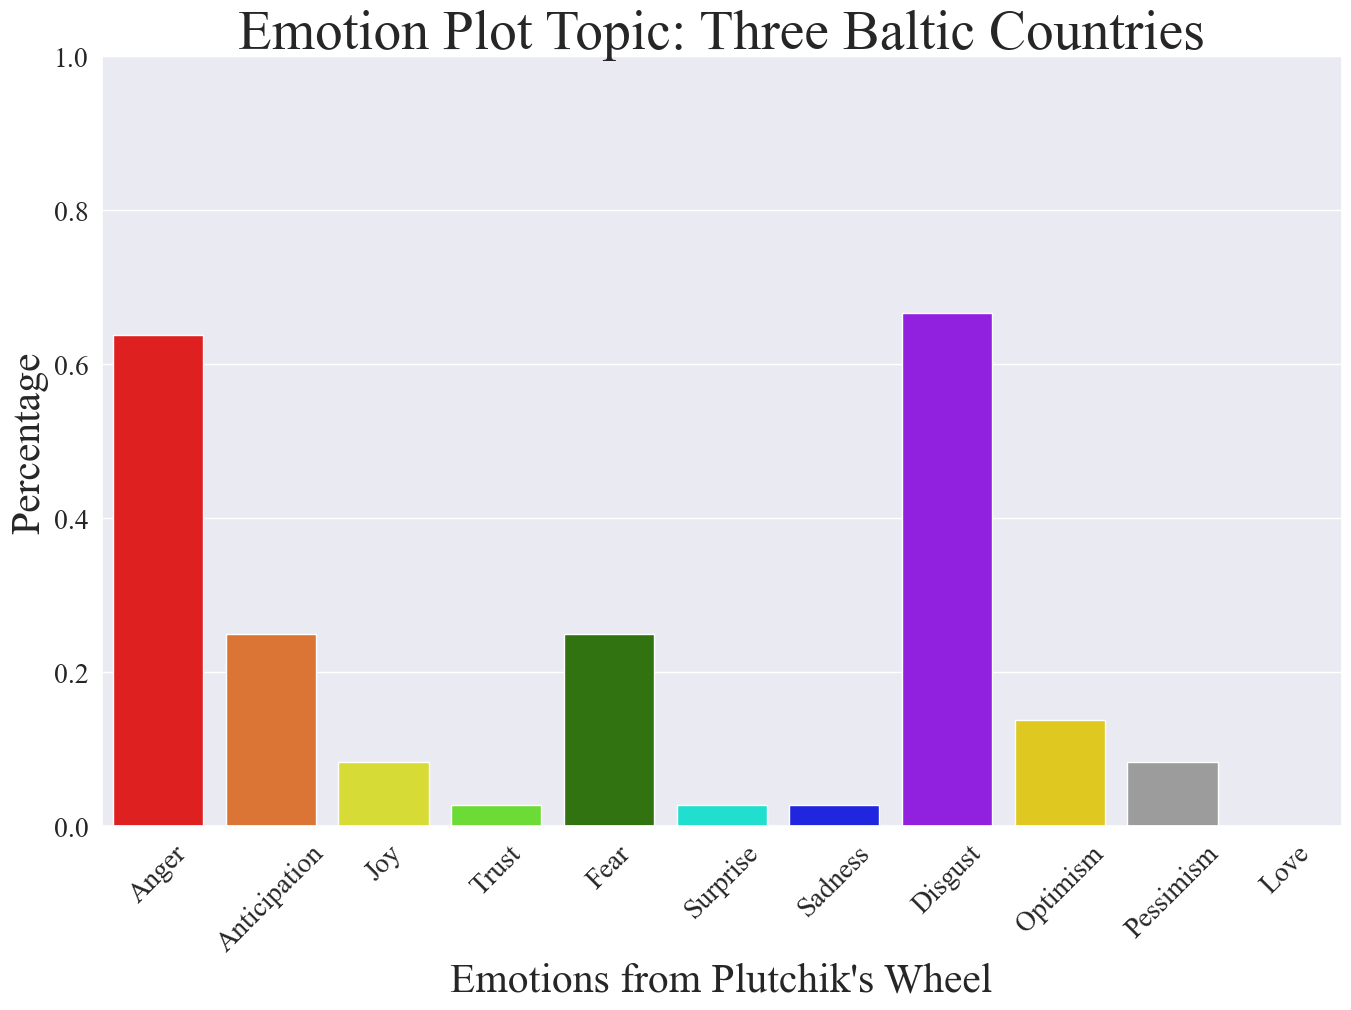

In [102]:


def Plot_Emotions(df_n_analysis  = df_1_analysis        , 
                  topic_type     = "Topic_Cluster"      , # "Topic_Cluster" or "BERTopic_Name"
                  topic_list     = ["NATO and Russia"]  , 
                  topic_name     = "NATO and Russia"    ,
                  search_topic   = False                , 
                  search_keyword = "Zelensky"           , 

                  ):
    
    #====================================================================================================#
    if search_topic == False:
        # Create a copy.
        df_n_analysis_ = copy.deepcopy(df_n_analysis)
        df_n_analysis_ = df_n_analysis_.loc[df_n_analysis_[topic_type].isin(topic_list)]
        # df_n_analysis_.drop(df_n_analysis_[~df_n_analysis_[topic_type].isin(topic_list)].index, inplace=True)


    if search_topic == True:
        similar_topics, _ = BERTopic_mpnet_base_1.find_topics(search_keyword, top_n = 5)
        print(similar_topics)

        df_n_analysis_ = copy.deepcopy(df_n_analysis)
        df_n_analysis_ = df_n_analysis_.loc[df_n_analysis_["BERTopic_ID"].isin(similar_topics)]

    #====================================================================================================#
    sentiment_list = \
        [
            "anger"        ,
            "anticipation" ,
            "joy"          ,
            "trust"        ,
            "fear"         ,
            "surprise"     ,
            "sadness"      ,
            "disgust"      ,
            "optimism"     ,
            "pessimism"    ,
            "love"         ,
        ]

    # [
    #     "anger"        ,
    #     "anticipation" ,
    #     "disgust"      ,
    #     "fear"         ,
    #     "joy"          ,
    #     "love"         ,
    #     "optimism"     ,
    #     "pessimism"    ,
    #     "sadness"      ,
    #     "surprise"     ,
    #     "trust"        ,
    # ]

    emotion_dict = dict([])
    
    count_name_list = ["count_" + sent_x for sent_x in sentiment_list ]

    for idx, sent_x in enumerate(sentiment_list):
        # locals()["count_" + sentiment_list[idx]] = \
        #     df_n_analysis_[sentiment_list[idx]].isin([1,]).sum()
        emotion_dict[sentiment_list[idx]] = \
            df_n_analysis_[sentiment_list[idx]].isin([1,]).sum() / len(df_n_analysis_)
    print(emotion_dict)

    df_emotion_percentage = pd.DataFrame({'Emotion': list(emotion_dict.keys()), 'Percentage': list(emotion_dict.values())})

    #====================================================================================================#
    ZX_barplot(dataframe           =   df_emotion_percentage                      ,
            x                   =   "Emotion"                                     ,
            y                   =   "Percentage"                                  ,
            palette             =   ['#FF0000', #  "anger"       
                                    '#F76E1A', #  "anticipation"
                                    '#F0F71A', #  "joy"         
                                    '#64F71A', #  "trust"       
                                    '#2C8300', #  "fear"        
                                    '#00FFE8', #  "surprise"    
                                    '#0008FF', #  "sadness"     
                                    '#9700FF', #  "disgust"     
                                    '#FFE000', #  "optimism"    
                                    '#9C9C9C', #  "pessimism"   
                                    '#FFB7B7', #  "love"        
                                    ]                                             ,

            order               =   sentiment_list                                ,
            x_title             =   "Emotions from Plutchik's Wheel"              ,
            y_title             =   "Percentage"                                  ,
            p_title             =   "Emotion Plot Topic: " + topic_name           ,
            xticklabels         =   [s.capitalize() for s in sentiment_list]      ,
            output_folder       =   Path("Part3_Figures/")                        ,
            output_file_header  =   "Emotion_Plot Topic - " + topic_name          ,
            rotation            =   45
            )
    
    return


Plot_Emotions(df_n_analysis   =  df_1_analysis                            , 
              topic_type      =  "Topic_Cluster"                          , # "Topic_Cluster" or "BERTopic_Name"
              topic_list      =  ["Civilians and Casualties"]                   , 
              topic_name      =  "Civilians and Casualties"                     , 
              search_topic    =  False                                    , 
              search_keyword  =  None                                     , 
              )

{'anger': 0.7288135593220338, 'anticipation': 0.11380145278450363, 'joy': 0.07021791767554479, 'trust': 0.002421307506053269, 'fear': 0.053268765133171914, 'surprise': 0.01694915254237288, 'sadness': 0.09443099273607748, 'disgust': 0.8498789346246973, 'optimism': 0.07021791767554479, 'pessimism': 0.07990314769975787, 'love': 0.004842615012106538}


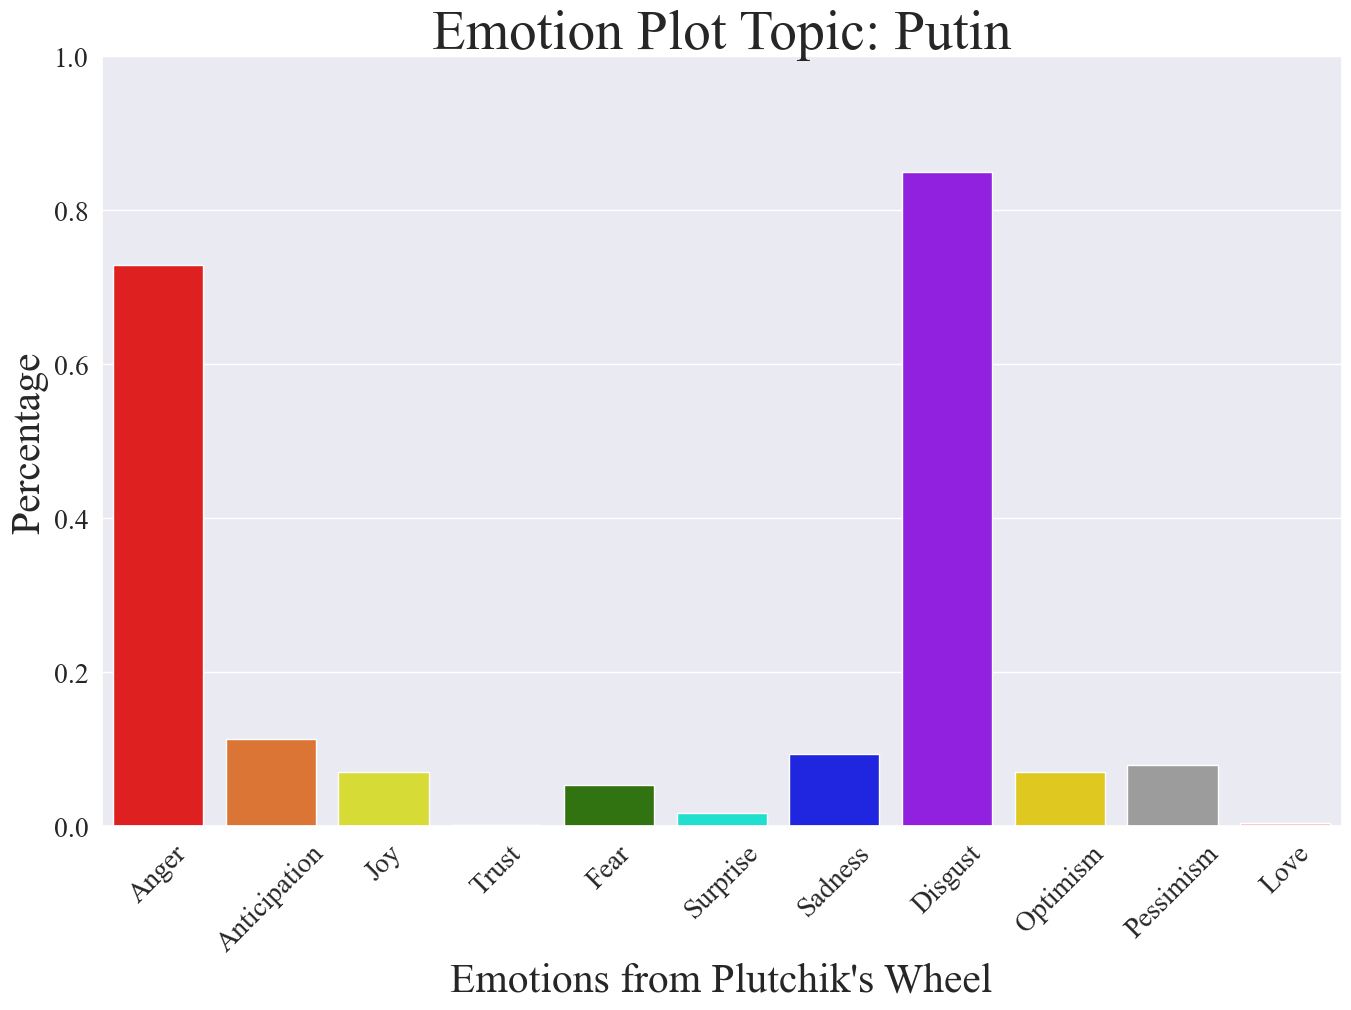

In [96]:
Plot_Emotions(df_n_analysis  = df_1_analysis        , 
              topic_type     = "Topic_Cluster"      , # "Topic_Cluster" or "BERTopic_Name"
              topic_list     = ["Putin"]            , 
              topic_name     = "Putin"              , 
              search_topic   = False                , 
              search_keyword = "Zelensky"           , 
              )


{'anger': 0.6323529411764706, 'anticipation': 0.21568627450980393, 'joy': 0.08333333333333333, 'trust': 0.04411764705882353, 'fear': 0.24019607843137256, 'surprise': 0.004901960784313725, 'sadness': 0.09803921568627451, 'disgust': 0.5882352941176471, 'optimism': 0.13725490196078433, 'pessimism': 0.07352941176470588, 'love': 0.00980392156862745}


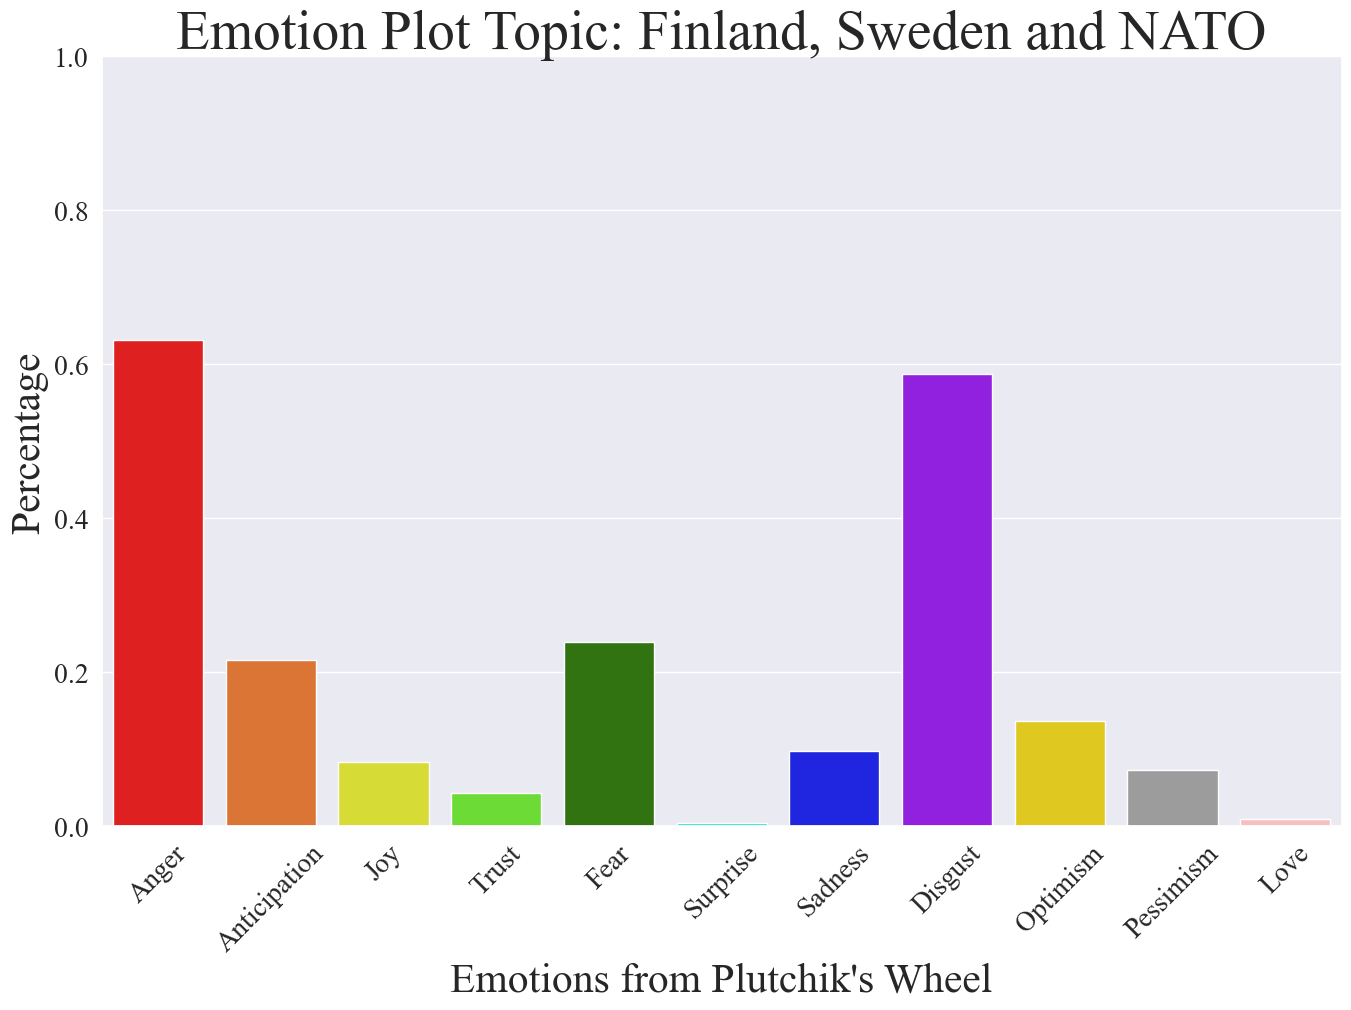

In [97]:
Plot_Emotions(df_n_analysis  = df_1_analysis                 , 
              topic_type     = "Topic_Cluster"               , # "Topic_Cluster" or "BERTopic_Name"
              topic_list     = ["Finland, Sweden and NATO"]  , 
              topic_name     = "Finland, Sweden and NATO"    , 
              search_topic   = False                         , 
              search_keyword = "Zelensky"                    , 
              )

{'anger': 0.25925925925925924, 'anticipation': 0.018518518518518517, 'joy': 0.6111111111111112, 'trust': 0.1111111111111111, 'fear': 0.0, 'surprise': 0.0, 'sadness': 0.05555555555555555, 'disgust': 0.2962962962962963, 'optimism': 0.46296296296296297, 'pessimism': 0.0, 'love': 0.2962962962962963}


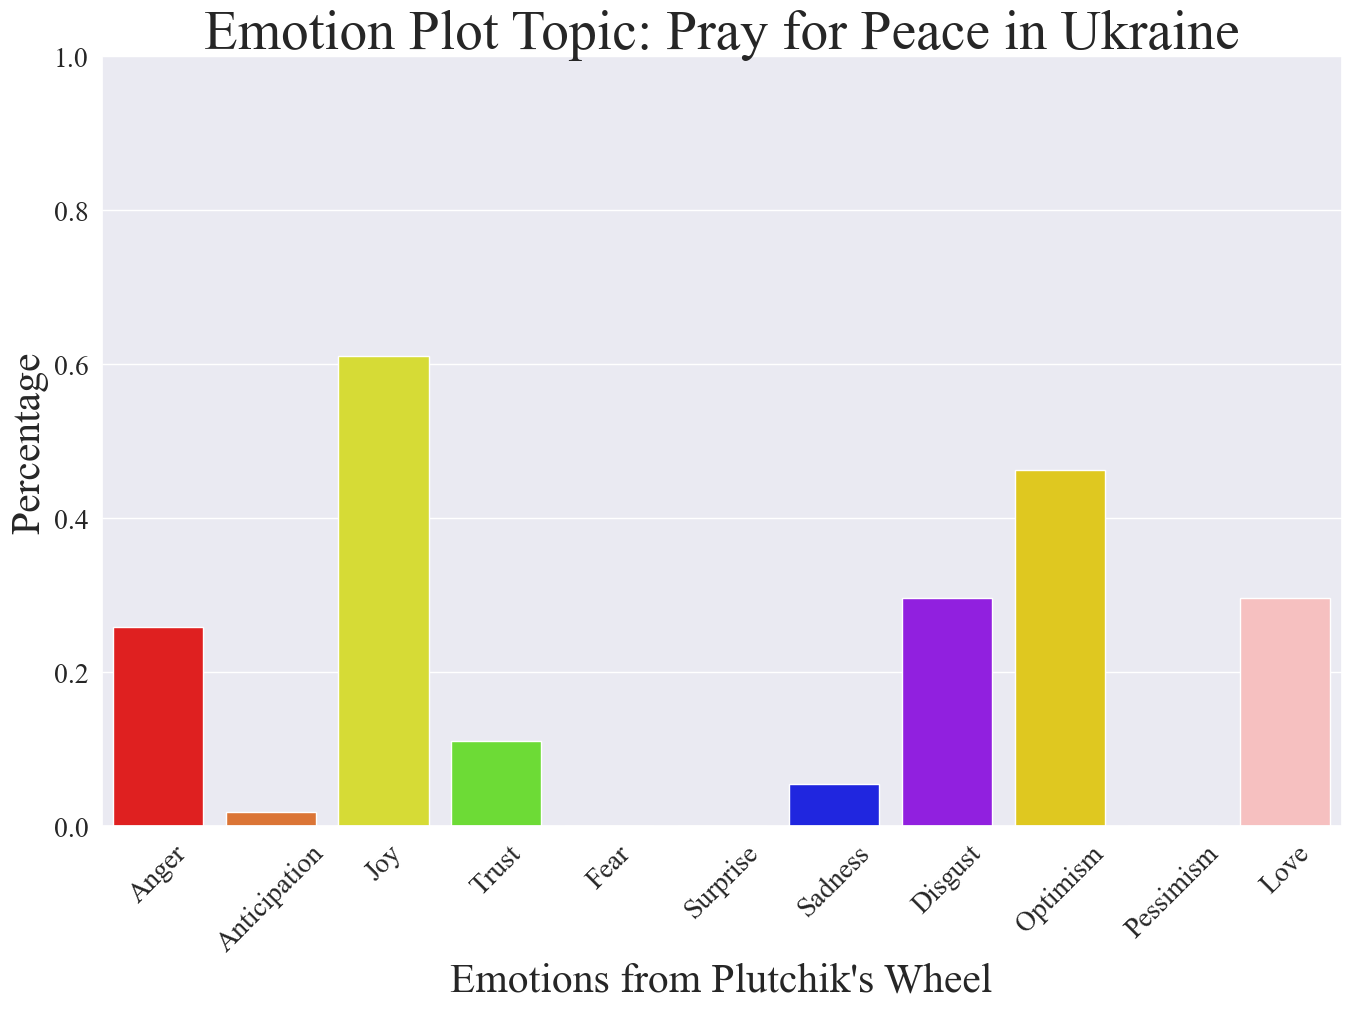

In [98]:
Plot_Emotions(df_n_analysis  = df_1_analysis                      , 
              topic_type     = "Topic_Cluster"                    , # "Topic_Cluster" or "BERTopic_Name"
              topic_list     = ["Pray for Peace in Ukraine"]      , 
              topic_name     = "Pray for Peace in Ukraine"        , 
              search_topic   = False                              , 
              search_keyword = "Zelensky"                         , 
              )

<br/>

<br/>

<br/>

<br/>

<br/>

<br/>



<br/>

## <font size="20"> &#10148; </font> Appendix - BERTopic Plots

In [10]:
BERTopic_mpnet_base_1.visualize_topics()

In [11]:
BERTopic_mpnet_base_1.visualize_hierarchy(top_n_topics=50)

In [15]:
BERTopic_mpnet_base_1.visualize_barchart(top_n_topics=8)

In [13]:
BERTopic_mpnet_base_1.visualize_heatmap(n_clusters=20, width=1000, height=1000)

In [ ]:
Dataset_2_topics_dict = {    0 : ["0_putin_him_he_his"                           , "Putin"                               ],  
                             1 : ["1_china_taiwan_chinese_xi"                    , "China Taiwan Issue"                  ],  
                             2 : ["2_kherson_forces_lysychansk_offensive"        , "Finland, Sweden and NATO"            ],  
                             4 : ["4_orban_hungary_hungarian_hungarians"         , "Orban and Hungary"                   ],  
                             6 : ["6_moldova_romania_transnistria_moldovan"      , "Moldova, Romania and Transnistria"   ],  
                             7 : ["7_barrel_bore_center_lathe"                   , "Military Industry"                   ],  
                             8 : ["8_surrender_casualties_civilians_civilian"    , "Surrender, Casualties and Civilians" ],  
                             9 : ["9_germany_gas_german_bundeswehr"              , "Germany"                             ],  
                            10 : ["10_threat_provoking_russia_threats"           , "Russia Pose Threats"            ],  
                            11 : ["11_zelensky_zelenskyy_munich_security"        , "Zelensky"                            ],  
                            12 : ["12_putin_he_his_him"                          , "Putin"                               ],  
                            13 : ["13_nato_russia_war_join"                      , "Nato and Russia Relation"            ],  
                            14 : ["14_uk_eu_europe_france"                       , "UK, EU, Europe and France"           ],  
                            16 : ["16_nato_members_alliance_defensive"           , "Nato Alliance Defense"               ],  
                            17 : ["17_lie_lying_truth_media"                     , "Media Truth or Lie"                  ],  
                            18 : ["18_trump_asset_his_putin"                     , "Trump and Putin"                     ],  
                            19 : ["19_reactor_reactors_chernobyl_water"          , "Chernobyl Reactors"                  ],  
                            20 : ["20_mercenaries_mercenary_conflict_armed"      , "Mercenary"                           ],  
                            21 : ["21_baltic_baltics_lithuania_states"           , "Three Baltic Countries"              ],  
                            22 : ["22_himars_missiles_range_system"              , "Firearms and Weapons"                ],  
                            23 : ["23_ukraine_pray_my_peace"                     , "Pray for Peace in Ukraine"           ],  
                            24 : ["24_lose_war_putin_winning"                    , "Putin"                               ],  
                            27 : ["27_belarus_continent_forget_center"           , "Belarus"                             ],  
                            29 : ["29_economy_economical_economics_shortages"    , "Economy"                             ],  
                            30 : ["30_bully_you_violence_fight"                  , "Violence"                            ],  
                            34 : ["34_explosion_shot_tank_explosions"            , "Firearms and Weapons"                ],  
                            36 : ["36_china_taiwan_hong_kong"                    , "China Taiwan Issue"                  ],  
                            37 : ["37_nato_ukraine_troops_border"                , "Nato and Ukraine Troops"             ],  
                            39 : ["39_biden_trump_republicans_he"                , "American Politicians"                ],  
                            41 : ["41_he_putin_ukraine_him"                      , "Putin"                               ],  
                            42 : ["42_language_russian_ukrainian_speak"          , "Ukraine-Russia issues"               ],  
                            43 : ["43_minsk_ukraine_russian_russians"            , "Belarus"                             ],  
                            44 : ["44_republican_republicans_poorly_party"       , "Republican"                          ],  
                            45 : ["45_phosphorus_incendiary_smoke_banned"        , "Firearms and Weapons"                ],  
                            47 : ["47_switchblade_artillery_armor_fire"          , "Firearms and Weapons"                ],  
                            }




In [ ]:
# Appendix

#====================================================================================================#
# BERTopic_mpnet_base on Dataset #1

# Manually select interested topics and perform analysis.
print(BERTopic_mpnet_base_1.get_topic_info().head(20))
print()

# Get a list of keywords in Topic #0
print(BERTopic_mpnet_base_1.get_topic(0))
print()

# Topic ID for the first 10 sentences in the document.

print(BERTopic_mpnet_base_1.topics_[:20]) 
print()

#topic_model.visualize_hierarchy(top_n_topics=50)

print("get_document_info: ")
df_doc_info_1 = BERTopic_mpnet_base_1.get_document_info(BERTopic_mpnet_base_1)
beautiful_print(df_doc_info_1)

#====================================================================================================#
# BERTopic_mpnet_base on Dataset #1
print(BERTopic_mpnet_base_2.get_topic_info().head(50))
print()



# Dataset_1_keyword_list = ["Nuke", "Ukraine", "Russia", "Hungary", "Germany", "Nato", "Putin", "Zelensky", "Biden", "Trump", "Firearms"]
# similar_topics, similarity = BERTopic_mpnet_base_1.find_topics("Nuke", top_n = 5)
# print(similar_topics)